<a href="https://colab.research.google.com/github/maggiejohnson20/DataProcessingAndVisualization/blob/main/Quiz29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard error occurs is known as the mean of the data when the user wants to find the confidence interval. 

In [2]:
import pandas as pa
import matplotlib.pyplot as plt

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')
df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


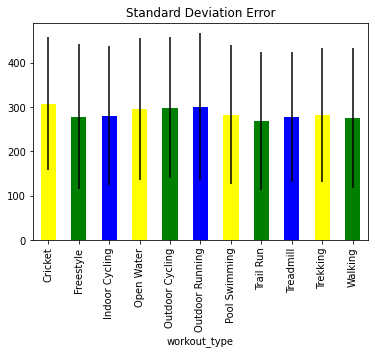

In [3]:
dfgrouped = df.groupby('workout_type').agg(['mean','std', 'count'])
dfgrouped.calories.plot.bar(y = 'mean',yerr = 'std', legend = False, color = ['yellow','green', 'blue'], title = "Standard Deviation Error")

In [6]:
import numpy as np
from scipy.stats import t

def SE(std,n):
  return std/np.sqrt(n)

groupedcalories= dfgrouped.calories
groupedcalories['SE'] = groupedcalories.apply(lambda x: SE(x['std'],x['count']), axis = 1)

groupedcalories.loc[:,'95%'] = groupedcalories.loc[:,'SE']*t.ppf(.975,499) 
groupedcalories

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,mean,std,count,SE,95%
workout_type,,,,,
Cricket,307.548387,149.950609,93,15.549154,30.549879
Freestyle,278.552083,163.703768,96,16.707946,32.826592
Indoor Cycling,280.450000,156.633322,80,17.512138,34.406612
Open Water,296.747253,160.068499,91,16.779738,32.967644
Outdoor Cycling,299.129412,158.731263,85,17.216823,33.826398
Outdoor Running,301.469136,165.725080,81,18.413898,36.178326
Pool Swimming,283.414894,157.576703,94,16.252796,31.932346
Trail Run,267.966667,155.748533,90,16.417337,32.255624
Treadmill,278.142857,146.963352,98,14.845540,29.167470


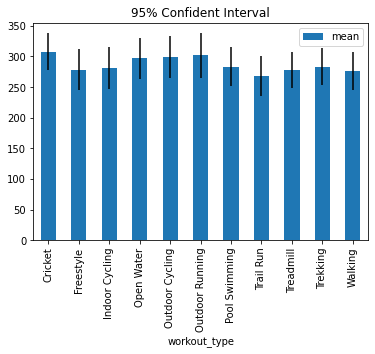

In [7]:
groupedcalories.plot.bar(y = 'mean',yerr = '95%', title = '95% Confident Interval' )